This notebook is a demo of using the functions defined in `scripts.outMigration_preprocessing` and `scripts.outMigration_prediction` to make prediction on the outmigration of 2023. 

First, import `pandas` to read data from the data folder, also functions `preprocess_sql`, `preprocessing`, and `prediction` from scripts folder. 

In [23]:
import pandas as pd
from scripts.outMigration_preprocessing import preprocess_sql, preprocessing
from scripts.outMigration_prediction import prediction

Then define the paths and read in data. 

In [31]:
cowichan_path = "../data/raw/cowichan_historic.csv"
salmon_path = "../data/raw/data_salmon2.csv"
temp_path = "../data/raw/northcochiwan_daily_temp.csv"
flow_path = "../data/raw/flow_2023.csv"
level_path = "../data/raw/level_2023.csv"

cowichan = pd.read_csv(cowichan_path)
salmon = pd.read_csv(salmon_path)
temp = pd.read_csv(temp_path)
level = pd.read_csv(level_path)
flow = pd.read_csv(flow_path)

Use the `preprocessed_sql` function to concat the salmon data from 2014 to 2020 that is stored in `data/raw/cowichan_historic.csv` and the salmon data from 2021 to 2023, which is stored in `data/raw/data_salmon2.csv` into one file. 

In [33]:
preprocessed_sql = preprocess_sql(salmon, cowichan)

After concating the salmon data, use the `preprocessing` function to merge the `preprocessed_sql` file with the temperature, flow, and level data. The function also prepare the data into a useable format for modeling. 

In [34]:
preprocessed_df = preprocessing("ck", preprocessed_sql, temp, level, flow)
preprocessed_df.to_csv("../data/preprocessed/demo_staging_df.csv", index=False)
preprocessed_df.head()

,date,month,year,Temp,Flow,Level,count,october_Flow,november_Flow,december_Temp,...,rolling_Flow_mean_5,rolling_Flow_std_15,rolling_Flow_std_10,rolling_Flow_std_5,rolling_Level_mean_15,rolling_Level_mean_10,rolling_Level_mean_5,rolling_Level_std_15,rolling_Level_std_10,rolling_Level_std_5
0,2013-09-02,9,2013,19.127273,0.8755,0.5480,0.0,7.679129,28.3825,3.965188,...,6.2720,2.078102,1.445607,0.760411,0.853367,0.8454,0.8273,0.061726,0.043477,0.025122
1,2013-09-03,9,2013,18.045833,0.7905,0.5405,0.0,7.679129,28.3825,3.965188,...,6.2720,2.078102,1.445607,0.760411,0.853367,0.8454,0.8273,0.061726,0.043477,0.025122
2,2013-09-04,9,2013,17.062500,0.7490,0.5365,0.0,7.679129,28.3825,3.965188,...,6.2720,2.078102,1.445607,0.760411,0.853367,0.8454,0.8273,0.061726,0.043477,0.025122
3,2013-09-05,9,2013,16.837500,0.6945,0.5300,0.0,7.679129,28.3825,3.965188,...,6.2720,2.078102,1.445607,0.760411,0.853367,0.8454,0.8273,0.061726,0.043477,0.025122
4,2013-09-06,9,2013,16.954167,0.6680,0.5280,0.0,7.679129,28.3825,3.965188,...,0.7555,2.078102,1.445607,0.082226,0.853367,0.8454,0.5366,0.061726,0.043477,0.008104


Define the path and read in the preprocessed data. 

In [29]:
preprocessed_path = "../data/preprocessed/demo_staging_df.csv"
preprocessed = pd.read_csv(preprocessed_path)

Then run the `prediction` function to make the prediction on the year 2023. The output shows a graph indicating the prediction of count and a string of dates of the prediction on the first 5% to 10% of the outmigration. 

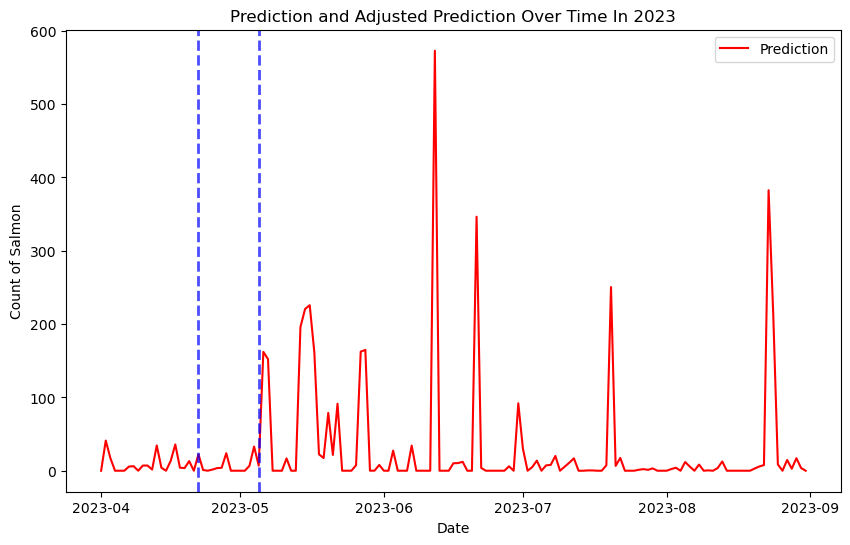

5% to 10% of salmon are predicted to be tagged between: 2023-04-22 to 2023-05-05.


In [35]:
prediction = prediction(preprocessed, 2023, 5, 10, True) # True means print picture 
prediction